<img src="logo.png" align="left"><br><br><br><br><br>

# Demonstration of detecting Data and Concept drift in ML
## Persona: ML Ops Engineer

Author: Dattaraj Rao (dattaraj_rao@pesistent.com) <br>
https://www.linkedin.com/in/dattarajrao/ 

<img src="ops_cycle.png" width="600" background="black"/>

# Load dataset from Data Catalog

Dataset source: https://www.kaggle.com/leonbora/analytics-vidhya-loan-prediction

In [1]:
'''
import dvc.api
import pandas as pd
from io import StringIO

# version 1
dataset1 = dvc.api.read(
    'bfsi/LoanApproval.csv',
    repo='/Users/dattaraj/Dattaraj/dvc',
    rev='HEAD~1',
    mode='r')
dataset_v1 = pd.read_csv(StringIO(dataset1))

dataset_v1 = dataset_v1.dropna()
dataset_v1 = dataset_v1.drop(['Loan_ID'], axis=1)
dataset_v1.head()
'''

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [7]:
import pandas as pd

# version 1 = loan_approval_dataset_v1.csv
# verson 2 = loan_approval_dataset_v2.csv
dataset_file = 'loan_approval_dataset_v1.csv' # v1
dataset_name = 'dataset-v1'

dataset_v1 = pd.read_csv(dataset_file)
dataset_v1 = dataset_v1.dropna()
dataset_v1 = dataset_v1.drop(['Loan_ID'], axis=1)

dataset_v1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


# Some basic feature engineering

In [8]:
from sklearn import preprocessing

cat_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

def feat_engg(dataset, features):
    for f in features:
        le = preprocessing.LabelEncoder()
        arr = dataset[f].unique()
        le.fit(arr)
        dataset[f] = le.transform(dataset[f])
        dataset[f] = pd.to_numeric(dataset[f], errors='coerce')
    return dataset

dataset_v1 = feat_engg(dataset_v1, cat_features)
dataset_v1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,Y


# Build ML Model using PyCaret

Reference: https://www.pycaret.org/tutorials/html/CLF101.html

In [9]:
from pycaret.classification import *

exp_clf101 = setup(data = dataset_v1, target = 'Loan_Status', session_id=123)

,Description,Value
0,session_id,123
1,Target,Loan_Status
2,Target Type,Binary
3,Label Encoded,"N: 0, Y: 1"
4,Original Data,"(480, 12)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8029,0.0000,0.9743,0.7962,0.8748,0.4368,0.4948,0.0060
lda,Linear Discriminant Analysis,0.8029,0.7267,0.9743,0.7962,0.8748,0.4368,0.4948,0.0050
lr,Logistic Regression,0.7999,0.7400,0.9612,0.7987,0.8709,0.4423,0.4946,0.5050
gbc,Gradient Boosting Classifier,0.7913,0.7444,0.9275,0.8077,0.8618,0.4429,0.4757,0.0270
nb,Naive Bayes,0.7852,0.7238,0.9315,0.7982,0.8585,0.4212,0.4529,0.0050
rf,Random Forest Classifier,0.7794,0.7419,0.9190,0.8004,0.8545,0.4093,0.4315,0.0660
ada,Ada Boost Classifier,0.7642,0.7109,0.8933,0.7995,0.8413,0.3824,0.4017,0.0320
lightgbm,Light Gradient Boosting Machine,0.7619,0.7104,0.8812,0.8007,0.8378,0.3925,0.4067,0.0170
et,Extra Trees Classifier,0.7256,0.6988,0.8589,0.7767,0.8149,0.2891,0.2933,0.0740
dt,Decision Tree Classifier,0.7080,0.6623,0.7792,0.8066,0.7880,0.3078,0.3156,0.0060


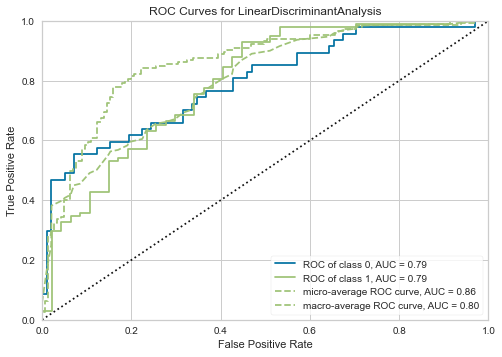

In [11]:
selected_model = top3[1]
plot_model(selected_model)

In [12]:
_ = predict_model(selected_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8069,0.7931,0.9694,0.7917,0.8716,0.4981,0.5421


# Load the first live dataset (from feature store)

This will be done automatically using a serving engine like Seldon (Ref: https://www.seldon.io/)

In [26]:
'''
import dvc.api
from io import StringIO

# version 1
dataset1 = dvc.api.read(
    'bfsi/LoanApproval_newdata.csv',
    repo='/Users/dattaraj/Dattaraj/dvc',
    rev='HEAD',
    mode='r')
dataset_new_v1 = pd.read_csv(StringIO(dataset1))

dataset_new_v1 = dataset_new_v1.dropna()
dataset_new_v1.head()
'''

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,1,2479,3013.0,188.0,360.0,1.0,2,0
1,1,1,3+,0,0,5250,0.0,94.0,360.0,1.0,2,0
2,1,1,2,1,0,3357,2859.0,144.0,360.0,1.0,2,1
3,0,0,0,1,1,17263,0.0,225.0,360.0,1.0,1,0
4,1,0,2,0,0,4923,0.0,166.0,360.0,0.0,1,1


In [28]:
dataset_new_v1 = pd.read_csv('live_data_batch1.csv')

# Analyze for Drift using Evidently AI

Very nice hand library for data and concept drift. Ref: https://evidentlyai.com/

In [29]:
from evidently.dashboard import Dashboard
from evidently.tabs import DataDriftTab, NumTargetDriftTab

from evidently.model_profile import Profile
from evidently.profile_sections import DataDriftProfileSection, NumTargetDriftProfileSection

drift_dashboard = Dashboard(tabs=[DataDriftTab])
drift_dashboard.calculate(dataset_v1[cat_features], 
                          dataset_new_v1[cat_features]) 

drift_dashboard.save("evidently/data_drift_livedata1.html")
drift_dashboard.show()

In [ ]:
drift_dashboard.save("evidently/data_drift_livedata1.html")

In [30]:
unseen_predictions = predict_model(selected_model, data=dataset_new_v1)
unseen_predictions.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Label,Score
0,0,1,1,0,0,1,0,0.0,0.0,84.0,0.0,1,0,N,0.7714
1,1,0,0,0,0,0,0,3000.0,0.0,360.0,1.0,1,0,Y,0.8795
2,2,0,1,2,0,0,6540,1500.0,0.0,180.0,1.0,1,1,Y,0.9556
3,3,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0,1,Y,0.9339
4,4,0,0,0,1,0,5677,0.0,94.0,360.0,1.0,0,0,Y,0.6416


In [31]:
unseen_predictions.loc[unseen_predictions.Label == 'Y', 'Label'] = 1
unseen_predictions.loc[unseen_predictions.Label == 'N', 'Label'] = 0
unseen_predictions['Label'] = pd.to_numeric(unseen_predictions['Label'], errors='coerce')

from sklearn.metrics import classification_report
print(classification_report(unseen_predictions['Label'], unseen_predictions['Loan_Status'], 
                            target_names=['Approved', 'Rejected']))

              precision    recall  f1-score   support

    Approved       0.77      1.00      0.87       117
    Rejected       1.00      0.53      0.70        75

    accuracy                           0.82       192
   macro avg       0.88      0.77      0.78       192
weighted avg       0.86      0.82      0.80       192



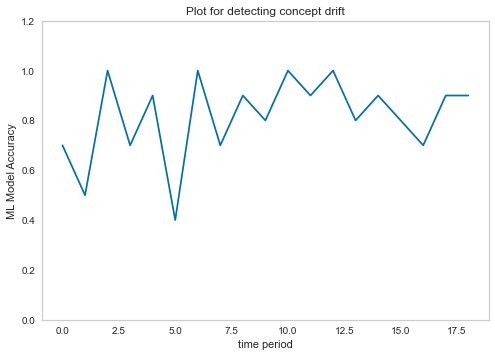

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def plot_cd(unseen_predictions, N=10):
    # Data for plotting
    count = len(unseen_predictions)
    accuracy_arr = []
    x_arr = []
    j = 0
    for i in range(N, count, N):
        x_arr.append(j)
        j = j+1
        accuracy_arr.append(sum(unseen_predictions.loc[i-N:i-1, "Label"] == unseen_predictions.loc[i-N:i-1, "Loan_Status"])/N)
    fig, ax = plt.subplots()
    ax.plot(x_arr, accuracy_arr)
    ax.set(xlabel='time period', ylabel='ML Model Accuracy',
           title='Plot for detecting concept drift')
    ax.grid()
    ax.set_ylim(0, 1.2)
    plt.show()
    
plot_cd(unseen_predictions, 10)

In [33]:
unseen_predictions['target'] = unseen_predictions['Loan_Status']
unseen_predictions['prediction'] = unseen_predictions['Label']

In [34]:
from evidently.tabs import ClassificationPerformanceTab, ProbClassificationPerformanceTab
from evidently.profile_sections import ClassificationPerformanceProfileSection, ProbClassificationPerformanceProfileSection

loan_column_mapping = {}
loan_column_mapping['target'] = 'Loan_Status'
loan_column_mapping['prediction'] = 'Label'
loan_column_mapping['numerical_features'] = ['Score', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

loan_model_performance = Dashboard(tabs=[ClassificationPerformanceTab])
loan_model_performance.calculate(unseen_predictions, unseen_predictions, column_mapping = loan_column_mapping)
loan_model_performance.save("evidently/concept_drift_livedata1.html")
loan_model_performance.show()

# Second live dataset

In [37]:
dataset_new_v2 = pd.read_csv('live_data_batch2.csv')

In [38]:
drift_dashboard = Dashboard(tabs=[DataDriftTab])
drift_dashboard.calculate(dataset_v1[cat_features], 
                          dataset_new_v2[cat_features]) 

drift_dashboard.save("evidently/data_drift_livedata2.html")
drift_dashboard.show()

In [39]:
unseen_predictions = predict_model(selected_model, data=dataset_new_v2)

unseen_predictions.loc[unseen_predictions.Label == 'Y', 'Label'] = 1
unseen_predictions.loc[unseen_predictions.Label == 'N', 'Label'] = 0
unseen_predictions['Label'] = pd.to_numeric(unseen_predictions['Label'], errors='coerce')

from sklearn.metrics import classification_report
print(classification_report(unseen_predictions['Label'], unseen_predictions['Loan_Status'], 
                            target_names=['Approved', 'Rejected']))

              precision    recall  f1-score   support

    Approved       0.17      0.40      0.24        30
    Rejected       0.85      0.63      0.72       162

    accuracy                           0.59       192
   macro avg       0.51      0.51      0.48       192
weighted avg       0.74      0.59      0.65       192



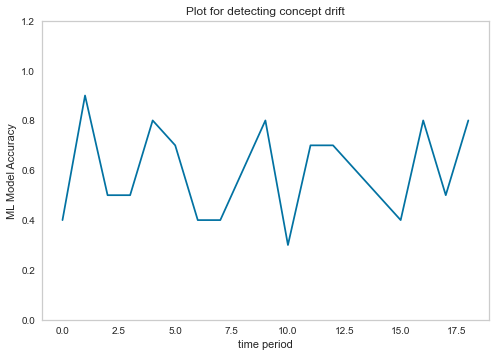

In [40]:
plot_cd(unseen_predictions, 10)

In [41]:
unseen_predictions['target'] = unseen_predictions['Loan_Status']
unseen_predictions['prediction'] = unseen_predictions['Label']

loan_model_performance = Dashboard(tabs=[ClassificationPerformanceTab])
loan_model_performance.calculate(unseen_predictions, unseen_predictions, column_mapping = loan_column_mapping)
loan_model_performance.save("evidently/concept_drift_livedata2.html")
loan_model_performance.show()